In [1]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating reproducible results from same code
tf.random.set_seed(14)

# EDA

In [3]:
raw_data = pd.read_csv('gas_turbines.csv')
raw_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


TEY is the variable we should predict.
We need to consider only ambient Variables AT AP AH. Rest can be ignored.

In [4]:
df = raw_data.copy() 
df = df.drop(['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], axis = 1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


No Null Values.

In [6]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


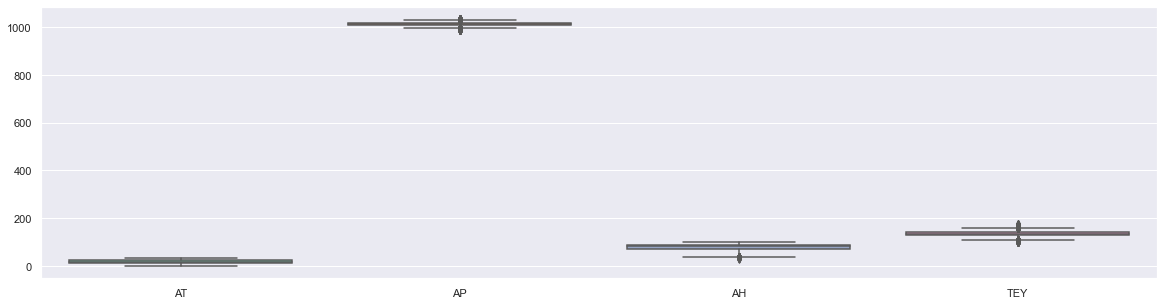

In [7]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.boxplot(data = df, orient = "v", palette = "Set2");

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
y_train = np.reshape(y_train.to_numpy(), (-1, 1))
y_test = np.reshape(y_test.to_numpy(), (-1, 1))

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale = scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale = scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale = scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale = scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [11]:
len(xtrain_scale)

10527

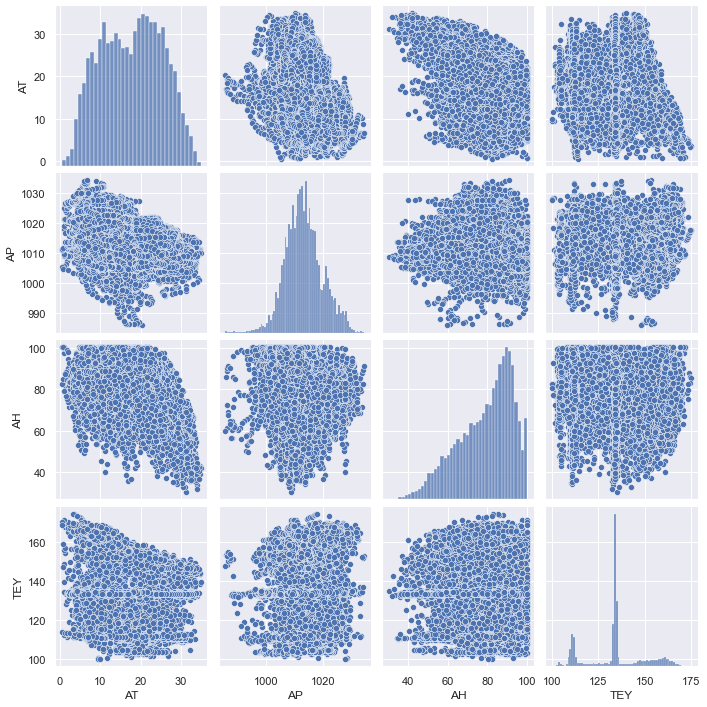

In [12]:
sns.pairplot(df, palette = 'deep');

# Neural Network Model

* Building the Model

In [13]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [14]:
import keras
keras. __version__

'2.5.0'

init method is not available in this version.

In [15]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim = 3, kernel_initializer = 'normal', activation = 'relu'))
model1.add(Dense(2106, kernel_initializer = 'normal', activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

In [16]:
# Compile model
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse','mae'])

In [17]:
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split = 0.33, epochs = 100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 19s 21ms/step - loss: 0.1186 - mse: 0.1186 - mae: 0.2760 - val_loss: 0.0471 - val_mse: 0.0471 - val_mae: 0.1558
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1536 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1572
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0438 - mse: 0.0438 - mae: 0.1578 - val_loss: 0.0433 - val_mse: 0.0433 - val_mae: 0.1616
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0431 - mse: 0.0431 - mae: 0.1613 - val_loss: 0.0423 - val_mse: 0.0423 - val_mae: 0.1605
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0413 - mse: 0.0413 - mae: 0.1581 - val_loss: 0.0418 - val_mse: 0.0418 - val_mae: 0.1600
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1551 - val_loss: 0.0422 - val_mse: 0.0422 - val_mae: 0.1636
Epoch 7/100
48/48 [=

Epoch 51/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1567 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1586
Epoch 52/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0382 - mse: 0.0382 - mae: 0.1549 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1586
Epoch 53/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1586 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1578
Epoch 54/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1571 - val_loss: 0.0405 - val_mse: 0.0405 - val_mae: 0.1609
Epoch 55/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1575 - val_loss: 0.0394 - val_mse: 0.0394 - val_mae: 0.1587
Epoch 56/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1580 - val_loss: 0.0392 - val_mse: 0.0392 - val_mae: 0.1568
Epoch 57/100
48/

48/48 [==============================] - 0s 6ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1530 - val_loss: 0.0391 - val_mse: 0.0391 - val_mae: 0.1578


At epoch 50, mse and mae just keeps oscillating back and forth.

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 2106)              10530     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2107      
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


* Model Evaluation

In [19]:
y_predict = model1.predict(xtest_scale)

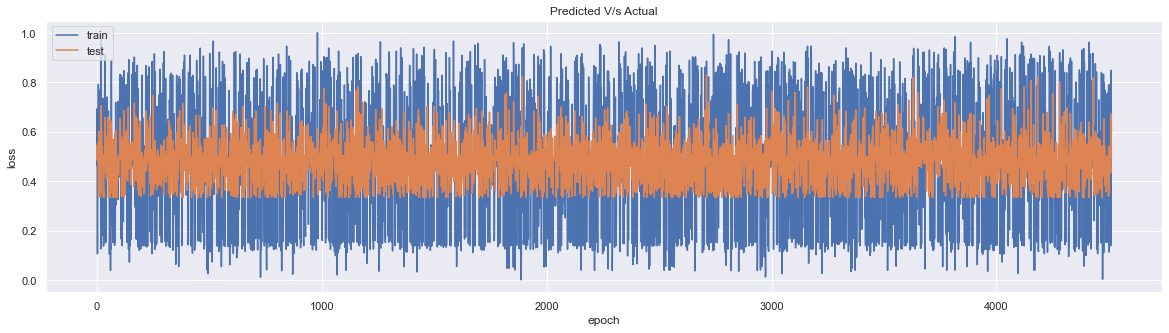

In [20]:
# Comparison of prediction and actual values

plt.plot(ytest_scale)
plt.plot(y_predict)
plt.title('Predicted V/s Actual')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Neural Networks is not a good model for predicting a regression problem.

In [21]:
hist1.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [22]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"] = hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038238,0.038238,0.152848,0.038836,0.038836,0.157531,95
96,0.039024,0.039024,0.156242,0.038978,0.038978,0.156931,96
97,0.038174,0.038174,0.153600,0.038581,0.038581,0.156432,97
98,0.038512,0.038512,0.156044,0.039037,0.039037,0.154967,98
99,0.038245,0.038245,0.153120,0.039061,0.039061,0.157840,99


* Visualize Training History

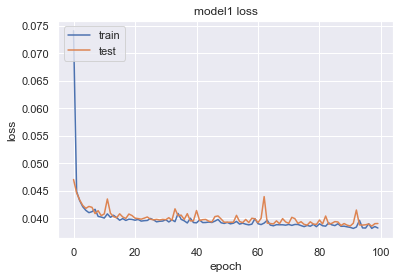

In [23]:
# summarize history for Loss

sns.set(rc = {'figure.figsize':(6, 4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

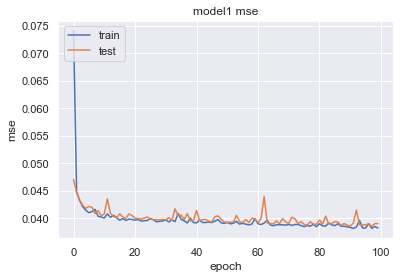

In [24]:
# summarize history for mse

plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()